### **Question 4**

You are provided with a dataset (view enclosed CSV file `hotel_bookings.csv`) containing **hotel booking demand information**.  
The dataset includes various attributes such as:

- **Booking and Arrival Dates**: Details of reservation and arrival dates.  
- **Lead Time**: Number of days between the booking date and the arrival date.  
- **Number of Nights**: Duration of the stay.  
- **Number of Adults and Children**: Information about the guests.  
- **Meal Type**: Selected meal plan.  
- **Country**: Guest's country of origin.  
- **Market Segment**: Market segment associated with the booking.  
- **Distribution Channel**: Channel used for the booking.  
- **Other Relevant Booking Details**.  

> **Note**: Some values in the dataset are missing and will require cleaning.

---

### **Task**

Perform an **exploratory data analysis (EDA)** using Python to:  

1. **Uncover Trends and Patterns**: Analyze the data to identify key insights.  
2. **Generate Insights**: Summarize your findings based on the analysis.  
3. **Document Your Methodology**: Clearly explain your approach.  
4. **Include Visualizations**: Use graphs and charts to support your conclusions.

In [13]:
#Import libraries needed to work with
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Reading the dataset in csv
file_name = 'hotel_bookings.csv' 
hotel_bookings_df = pd.read_csv(file_name)

#Visualising first rows
hotel_bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Shape of the dataset
print("Number of rows:", hotel_bookings_df.shape[0]) # Number of rows
print("Number of columns:", hotel_bookings_df.shape[1]) # Number of columns

Number of rows: 119390
Number of columns: 32


In [6]:
#View type of data in the different columns
hotel_bookings_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
#Check unique values per each column and also column naming
hotel_bookings_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [8]:
# Shown unique values per each column to understand better the dataset
for column in hotel_bookings_df.columns:
    print(f"Unique values per column'{column}':")
    print(hotel_bookings_df[column].unique())
    print("\n" + "-"*50 + "\n")

Unique values per column'hotel':
['Resort Hotel' 'City Hotel']

--------------------------------------------------

Unique values per column'is_canceled':
[0 1]

--------------------------------------------------

Unique values per column'lead_time':
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 33

In [9]:
#Check if there is duplicates
#Function to handle duplicates
def handle_duplicates(df):
    """
    Identify and handle duplicate rows in the dataframe by removing them.
    
    Args:
    df (pd.DataFrame): The input dataframe with potential duplicate rows.
    
    Returns:
    pd.DataFrame: The dataframe with duplicates handled and index reset.
    """
    # Count the number of duplicate rows
    number_of_duplicates = df.duplicated().sum()
    print(f"Number of duplicated rows before cleaning: {number_of_duplicates}")

    # Remove duplicates and reset index
    df_cleaned = df.drop_duplicates(keep='first').reset_index(drop=True)
    
    # Count duplicates again after cleaning
    duplicates_after = df_cleaned.duplicated().sum()
    print(f"Number of duplicated rows after cleaning: {duplicates_after}")

    return df_cleaned

# Step 1: Handle duplicates
hotel_bookings= handle_duplicates(hotel_bookings_df)

Number of duplicated rows before cleaning: 31994
Number of duplicated rows after cleaning: 0


In [10]:
#Check if there is some null values
#Function to handle null values
def handle_null_values(df):
    """
    Handle null values in the dataframe by filling them with appropriate statistics.
    
    Args:
    df (pd.DataFrame): The input dataframe with potential null values.
    
    Returns:
    pd.DataFrame: The dataframe with null values handled.
    """
    # Count the number of null values in each column
    print("Number of null values in each column before handling:")
    print(df.isna().sum())

    # Drop rows where all columns are NaN
    df = df.dropna(how='all')

    #Fill NaN values in certain columns
    df['children'] = df['children'].fillna(0)  # Asume they don not have kids
    df['country'] = df['country'].fillna('Unknown')
    df['agent'] = df['agent'].fillna('0')
    df['company'] = df['company'].fillna('0')

    # Check if there are any remaining null values
    remaining_nulls = df.isnull().sum()
    print("\nNumber of null values in each column after handling:")
    print(remaining_nulls[remaining_nulls > 0])

    return df

# Step 2: Handle null values, including single NaN row removal
hotel_bookings = handle_null_values(hotel_bookings)

Number of null values in each column before handling:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                     

In [32]:
# Calcular la tasa de cancelación
cancelation_rate = hotel_bookings['is_canceled'].mean()

# Mostrar el resultado en porcentaje
print(f"Tasa de Cancelación: {cancelation_rate * 100:.2f}%")

Tasa de Cancelación: 27.49%


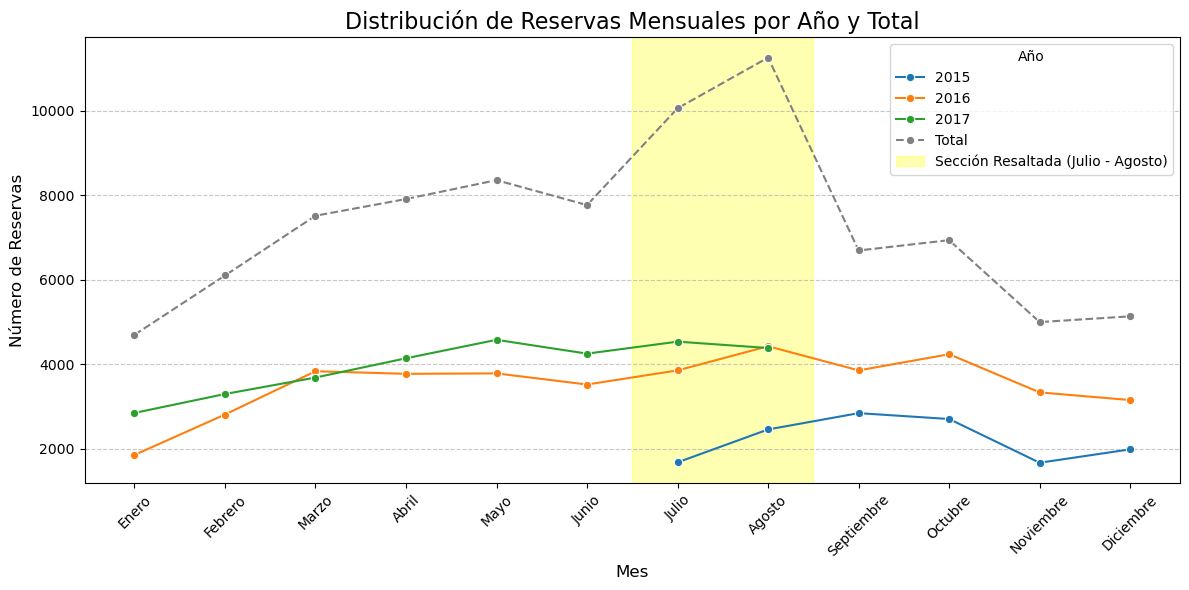

In [29]:
# Diccionario para asignar números a los meses (si está en formato texto)
month_order = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

# Convertir los meses a números usando el diccionario
df_summary_reservations["month_num"] = df_summary_reservations["arrival_date_month"].map(month_order)

# Ordenar el DataFrame por año y mes
df_summary = df_summary_reservations.sort_values(["arrival_date_year", "month_num"])

# Crear la columna "year_month" para representar el año y mes
df_summary["year_month"] = df_summary["arrival_date_year"].astype(str) + '-' + df_summary["arrival_date_month"]

# Sumar las reservas de todos los años por mes
df_total = df_summary.groupby("month_num")["number_of_reservations"].sum().reset_index()
df_total["year_month"] = "Total"  # Etiqueta para la línea total

# Paleta de colores personalizada
custom_palette = {
    2015: "#1f77b4",  # Azul
    2016: "#ff7f0e",  # Naranja
    2017: "#2ca02c",  # Verde
}

# Graficar los datos
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_summary,
    x="month_num",  # Usar el número del mes para asegurar el orden cronológico
    y="number_of_reservations",
    hue="arrival_date_year",
    marker="o",
    palette=custom_palette
)

# Agregar la línea de la suma total (discontinua)
sns.lineplot(
    data=df_total,
    x="month_num",  # Usar el número del mes
    y="number_of_reservations",
    color="grey",  # Línea negra para la suma total
    marker="o",
    label="Total",
    linestyle="--"  # Línea discontinua
)

# Resaltar la sección entre julio (7) y agosto (8)
plt.axvspan(7 - 0.5, 8 + 0.5, color='yellow', alpha=0.3, label="Sección Resaltada (Julio - Agosto)")

# Personalizar el gráfico
plt.title("Distribución de Reservas Mensuales por Año y Total", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de Reservas", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
                                       "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.legend(title="Año", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [34]:
# Filtrar las reservas de julio y agosto
df_july = hotel_bookings[hotel_bookings['arrival_date_month'] == 'July']
df_august = hotel_bookings[hotel_bookings['arrival_date_month'] == 'August']

# Calcular el tiempo medio de antelación (lead time) para julio y agosto
mean_lead_time_july = df_july['lead_time'].mean()
mean_lead_time_august = df_august['lead_time'].mean()

# Mostrar los resultados
print(f"Tiempo medio de antelación para Julio: {mean_lead_time_july:.2f} días")
print(f"Tiempo medio de antelación para Agosto: {mean_lead_time_august:.2f} días")

Tiempo medio de antelación para Julio: 111.96 días
Tiempo medio de antelación para Agosto: 102.68 días


C:\Users\celia\AppData\Local\Temp\ipykernel_14840\3336738619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meal_counts.index, y=meal_counts.values, palette='viridis')


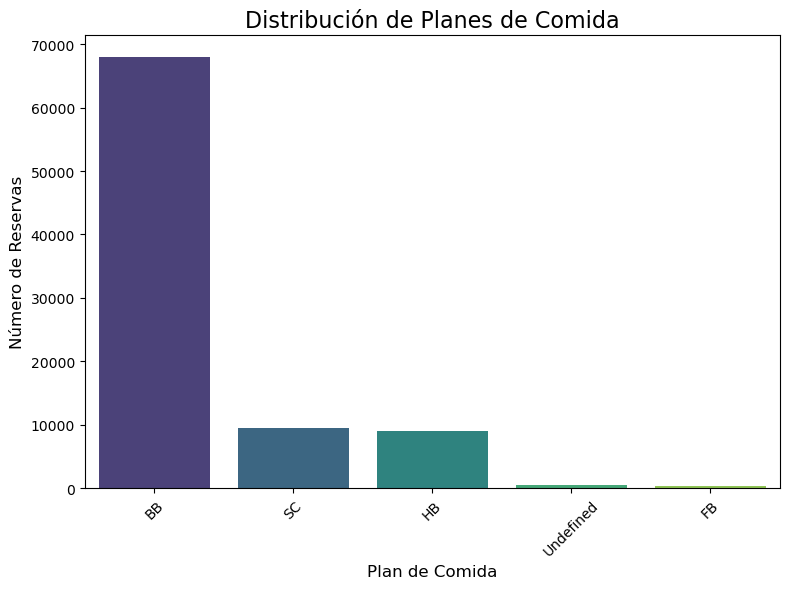

In [36]:
#¿Qué tipo de pension suele triunfar más?

# Frecuencia de cada valor único en la columna 'meal'
meal_counts = hotel_bookings['meal'].value_counts()

# Graficar el resultado
plt.figure(figsize=(8, 6))
sns.barplot(x=meal_counts.index, y=meal_counts.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Planes de Comida', fontsize=16)
plt.xlabel('Plan de Comida', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas para mejorar la visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\celia\AppData\Local\Temp\ipykernel_14840\2205562981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_counts.index, y=hotel_counts.values, palette='viridis')


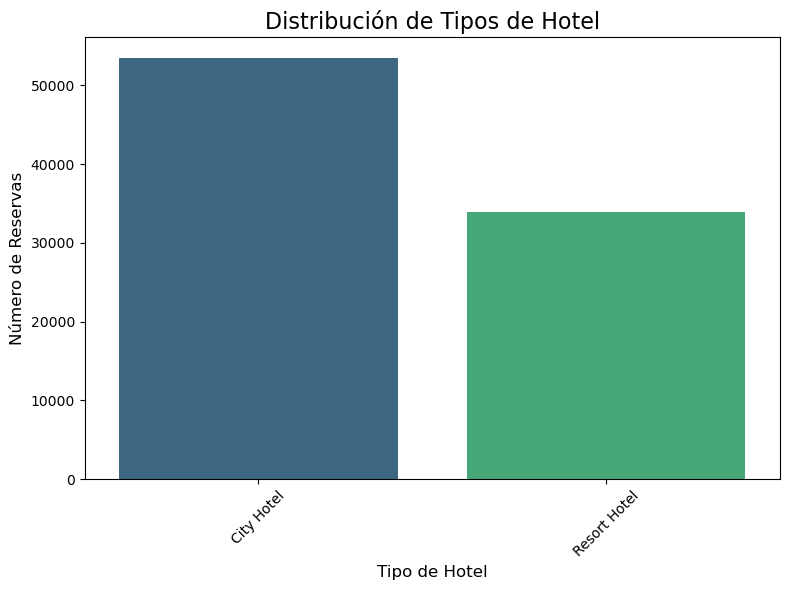

In [38]:
# Contamos la frecuencia de cada valor único en la columna 'hotel'
hotel_counts = hotel_bookings['hotel'].value_counts()

# Graficar el resultado
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_counts.index, y=hotel_counts.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Tipos de Hotel', fontsize=16)
plt.xlabel('Tipo de Hotel', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas para mejorar la visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\celia\AppData\Local\Temp\ipykernel_14840\2406732443.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_counts_july.index, y=hotel_counts_july.values, palette='Blues', ax=axes[0])
C:\Users\celia\AppData\Local\Temp\ipykernel_14840\2406732443.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_counts_august.index, y=hotel_counts_august.values, palette='Oranges', ax=axes[1])


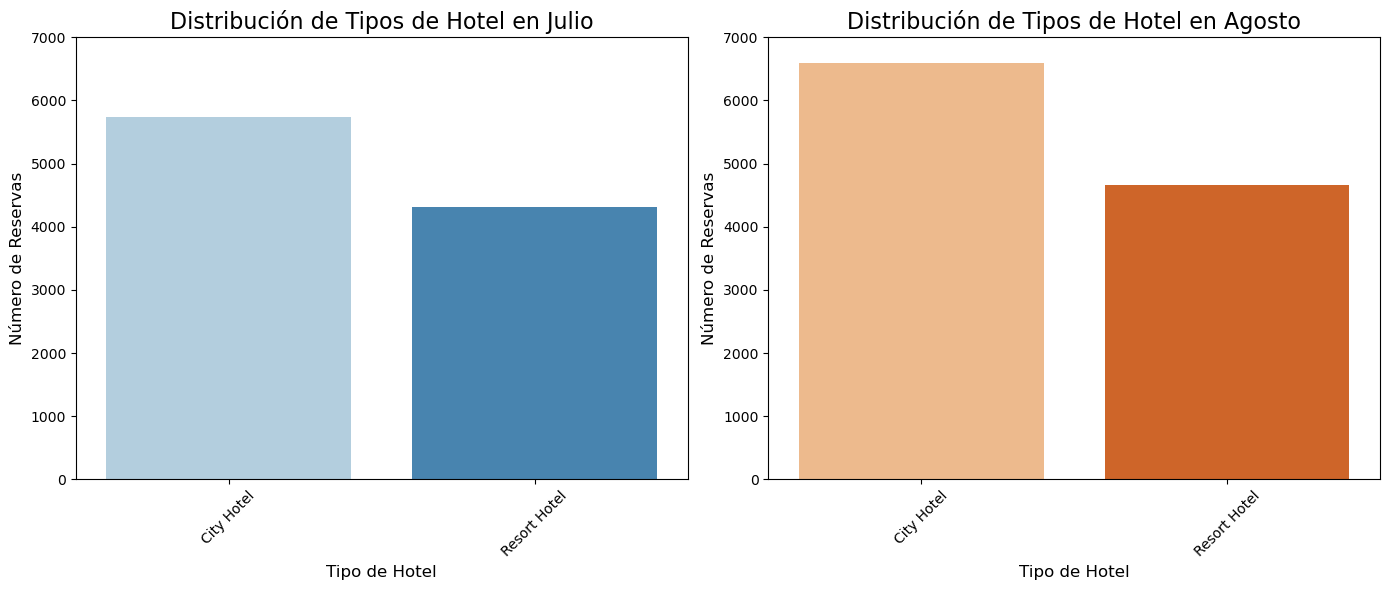

In [43]:
# Filtrar las reservas de julio y agosto
df_july = hotel_bookings[hotel_bookings['arrival_date_month'] == 'July']
df_august = hotel_bookings[hotel_bookings['arrival_date_month'] == 'August']

# Contar las frecuencias de los tipos de hotel para julio y agosto
hotel_counts_july = df_july['hotel'].value_counts()
hotel_counts_august = df_august['hotel'].value_counts()

# Crear la figura con dos subgráficos (uno para julio y otro para agosto)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Graficar las reservas de julio
sns.barplot(x=hotel_counts_july.index, y=hotel_counts_july.values, palette='Blues', ax=axes[0])
axes[0].set_title('Distribución de Tipos de Hotel en Julio', fontsize=16)
axes[0].set_xlabel('Tipo de Hotel', fontsize=12)
axes[0].set_ylabel('Número de Reservas', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)  # Rotar las etiquetas

# Graficar las reservas de agosto
sns.barplot(x=hotel_counts_august.index, y=hotel_counts_august.values, palette='Oranges', ax=axes[1])
axes[1].set_title('Distribución de Tipos de Hotel en Agosto', fontsize=16)
axes[1].set_xlabel('Tipo de Hotel', fontsize=12)
axes[1].set_ylabel('Número de Reservas', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)  # Rotar las etiquetas

# Ajustar los límites del eje Y para ambos gráficos
axes[0].set_ylim(0, 7000)  # Establecer límite superior de 9000 en el eje Y para el gráfico de julio
axes[1].set_ylim(0, 7000)  # Establecer límite superior de 9000 en el eje Y para el gráfico de agosto

# Ajustar los márgenes y el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\celia\AppData\Local\Temp\ipykernel_14840\691510042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reservation_status_counts.index, y=reservation_status_counts.values, palette='Set2')


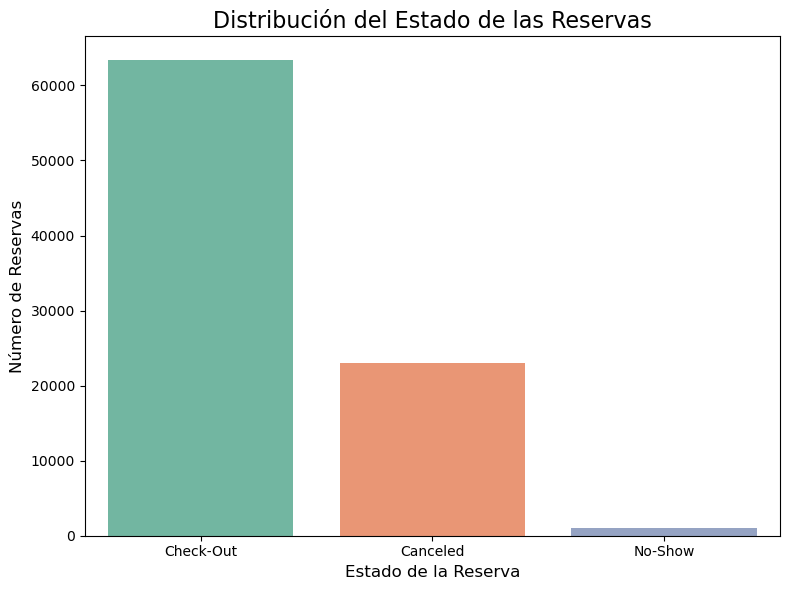

In [44]:
# Contar las frecuencias de cada estado de la reserva
reservation_status_counts = hotel_bookings['reservation_status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=reservation_status_counts.index, y=reservation_status_counts.values, palette='Set2')

# Personalizar el gráfico
plt.title('Distribución del Estado de las Reservas', fontsize=16)
plt.xlabel('Estado de la Reserva', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
